In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow をインストール

import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
hist = model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2984 - accuracy: 0.9129
Epoch 2/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1469 - accuracy: 0.9559
Epoch 3/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1099 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0899 - accuracy: 0.9720
Epoch 5/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0780 - accuracy: 0.9757
10000/10000 - 1s - loss: 0.0741 - accuracy: 0.9779


[0.0740749667301774, 0.9779]

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(hist.epoch, hist.history['loss'], label='loss')
#plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss: sparse_categorical_crossentropy')
plt.legend()
plt.show()

<Figure size 500x400 with 1 Axes>

In [7]:
model.predict(x_test)
#model.predict(x_test[0])

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (28, 28)

In [18]:
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

7


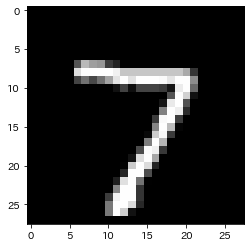

In [16]:
# 画像を表示してみます
import matplotlib.pyplot as plt
%matplotlib inline

k = 0
print(y_test[k])
plt.imshow(x_test[k].reshape((28, 28)), cmap='gray')
plt.show()

In [20]:
hist.history

{'loss': [0.06617756469218682,
  0.05972372876598189,
  0.053208211633531996,
  0.04864124781622862,
  0.04483283630344086],
 'accuracy': [0.9791833, 0.9813167, 0.98261666, 0.9837667, 0.9852333]}